## Pre-Processing and Data Cleaning

### Part A GDP Data 

In [7]:
import pandas as pd

# === Load GDP Data ===
gdp_df = pd.read_csv("all_gdp_data.csv")


In [8]:
gdp_df

,GeoFips,GeoName,LineCode,Description,Time,GDP,State,YearQuarter
0,1000,Alabama,1,All industry total,2005:Q1,195673.0,alabama_gdp_quarterly.csv,2005 Q1
1,1000,Alabama,1,All industry total,2005:Q2,197495.8,alabama_gdp_quarterly.csv,2005 Q2
2,1000,Alabama,1,All industry total,2005:Q3,196798.5,alabama_gdp_quarterly.csv,2005 Q3
3,1000,Alabama,1,All industry total,2005:Q4,199018.6,alabama_gdp_quarterly.csv,2005 Q4
4,1000,Alabama,1,All industry total,2006:Q1,199142.9,alabama_gdp_quarterly.csv,2006 Q1
...,...,...,...,...,...,...,...,...
3945,56000,Wyoming,1,All industry total,2023:Q3,40799.4,wyoming,2023 Q3
3946,56000,Wyoming,1,All industry total,2023:Q4,40824.8,wyoming,2023 Q4
3947,56000,Wyoming,1,All industry total,2024:Q1,40070.0,wyoming,2024 Q1
3948,56000,Wyoming,1,All industry total,2024:Q2,40414.4,wyoming,2024 Q2


In [9]:
gdp_df["State"] = gdp_df["GeoName"].str.lower().str.strip()
gdp_df.drop(columns=[ "GeoName"], inplace=True)


In [10]:
gdp_df["State"].unique()

array(['alabama', 'alaska', 'arizona', 'arkansas', 'california',
       'colorado', 'connecticut', 'delaware', 'florida', 'georgia',
       'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas',
       'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts',
       'michigan', 'minnesota', 'mississippi', 'missouri', 'montana',
       'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico',
       'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma',
       'oregon', 'pennsylvania', 'rhode island', 'south carolina',
       'south dakota', 'tennessee', 'texas', 'utah', 'vermont',
       'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming'],
      dtype=object)

In [11]:

# Sort and compute GDP growth per state
gdp_df = gdp_df.sort_values(by=["State", "YearQuarter"])
gdp_df["gdp_growth"] = gdp_df.groupby("State")["GDP"].pct_change()


gdp_df.groupby("State"): groups the data so we can do time-series operations within each state separately.

["GDP"].pct_change(): computes the percentage change from one row to the next in the GDP column (i.e., 

✅ What you get:
A new column gdp_growth with quarterly GDP growth rates for each state.

The first quarter for each state will be NaN (no previous value to compare).



In [12]:
gdp_df

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
0,1000,1,All industry total,2005:Q1,195673.0,alabama,2005 Q1,NaN
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
...,...,...,...,...,...,...,...,...
3945,56000,1,All industry total,2023:Q3,40799.4,wyoming,2023 Q3,0.017969
3946,56000,1,All industry total,2023:Q4,40824.8,wyoming,2023 Q4,0.000623
3947,56000,1,All industry total,2024:Q1,40070.0,wyoming,2024 Q1,-0.018489
3948,56000,1,All industry total,2024:Q2,40414.4,wyoming,2024 Q2,0.008595


### Part B - Employment Data

In [13]:
# === Load Employment Data ===
employment_df = pd.read_csv("employment_panel.csv")



In [14]:
employment_df

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,State,Date
0,1976,Jan,57.1,53.3,1486509,1387606,98903,6.7,alabama,1976-01-01
1,1976,Feb,56.9,53.2,1485944,1387267,98677,6.6,alabama,1976-02-01
2,1976,Mar,56.8,53.1,1486172,1388303,97869,6.6,alabama,1976-03-01
3,1976,Apr,56.8,53.1,1488773,1392012,96761,6.5,alabama,1976-04-01
4,1976,May,56.8,53.2,1492486,1396244,96242,6.4,alabama,1976-05-01
...,...,...,...,...,...,...,...,...,...,...
24144,2024,Sep,66.0,64.0,3182957,3087095,95862,3.0,wisconsin,2024-09-01
24145,2024,Oct,66.0,64.0,3185395,3087565,97830,3.1,wisconsin,2024-10-01
24146,2024,Nov,66.0,63.9,3185724,3087089,98635,3.1,wisconsin,2024-11-01
24147,2024,Dec,65.9,63.9,3185399,3086732,98667,3.1,wisconsin,2024-12-01


In [15]:
# Clean + Normalize State names
employment_df["State"] = employment_df["State"].str.lower().str.strip()


In [16]:
# Ensure employment is numeric
employment_df["employment"] = pd.to_numeric(employment_df["employment"], errors="coerce")

In [17]:
# Sort chronologically within state
employment_df = employment_df.sort_values(by=["State", "Date"])

# Compute monthly employment growth
employment_df["employment_growth"] = employment_df.groupby("State")["employment"].pct_change()

In [18]:
employment_df

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,State,Date,employment_growth
0,1976,Jan,57.1,53.3,1486509,1387606,98903,6.7,alabama,1976-01-01,NaN
1,1976,Feb,56.9,53.2,1485944,1387267,98677,6.6,alabama,1976-02-01,-0.000244
2,1976,Mar,56.8,53.1,1486172,1388303,97869,6.6,alabama,1976-03-01,0.000747
3,1976,Apr,56.8,53.1,1488773,1392012,96761,6.5,alabama,1976-04-01,0.002672
4,1976,May,56.8,53.2,1492486,1396244,96242,6.4,alabama,1976-05-01,0.003040
...,...,...,...,...,...,...,...,...,...,...,...
24144,2024,Sep,66.0,64.0,3182957,3087095,95862,3.0,wisconsin,2024-09-01,0.000430
24145,2024,Oct,66.0,64.0,3185395,3087565,97830,3.1,wisconsin,2024-10-01,0.000152
24146,2024,Nov,66.0,63.9,3185724,3087089,98635,3.1,wisconsin,2024-11-01,-0.000154
24147,2024,Dec,65.9,63.9,3185399,3086732,98667,3.1,wisconsin,2024-12-01,-0.000116


In [19]:
# Optional: Filter both datasets to start from 2005 Q2
# gdp_growth_df = gdp_growth_df[gdp_growth_df["YearQuarter"] >= "2005 Q2"]
#uarterly_employment_growth = quarterly_employment_growth[quarterly_employment_growth["YearQuarter"] >= "2005 Q2"]


In [20]:
employment_df["Date"] = pd.to_datetime(employment_df["Date"])
employment_df["YearQuarter"] = (
    employment_df["Date"]
    .dt.to_period("Q")       # Converts to a quarterly period like 2005Q2 (as a Period object)
    .astype(str)             # Converts it to a string: '2005Q2'
    .str.replace("Q", " Q")  # Turns '2005Q2' → '2005 Q2' to match GDP format
)


In [21]:
employment_df

,Year,Period,labor force participation rate,employment-population ratio,labor force,employment,unemployment,unemployment rate,State,Date,employment_growth,YearQuarter
0,1976,Jan,57.1,53.3,1486509,1387606,98903,6.7,alabama,1976-01-01,NaN,1976 Q1
1,1976,Feb,56.9,53.2,1485944,1387267,98677,6.6,alabama,1976-02-01,-0.000244,1976 Q1
2,1976,Mar,56.8,53.1,1486172,1388303,97869,6.6,alabama,1976-03-01,0.000747,1976 Q1
3,1976,Apr,56.8,53.1,1488773,1392012,96761,6.5,alabama,1976-04-01,0.002672,1976 Q2
4,1976,May,56.8,53.2,1492486,1396244,96242,6.4,alabama,1976-05-01,0.003040,1976 Q2
...,...,...,...,...,...,...,...,...,...,...,...,...
24144,2024,Sep,66.0,64.0,3182957,3087095,95862,3.0,wisconsin,2024-09-01,0.000430,2024 Q3
24145,2024,Oct,66.0,64.0,3185395,3087565,97830,3.1,wisconsin,2024-10-01,0.000152,2024 Q4
24146,2024,Nov,66.0,63.9,3185724,3087089,98635,3.1,wisconsin,2024-11-01,-0.000154,2024 Q4
24147,2024,Dec,65.9,63.9,3185399,3086732,98667,3.1,wisconsin,2024-12-01,-0.000116,2024 Q4


In [22]:
# Aggregate monthly to quarterly (mean growth per quarter)
quarterly_employment_growth = (
    employment_df.dropna(subset=["employment_growth"])
    .groupby(["State", "YearQuarter"])["employment_growth"]
    .mean()
    .reset_index()
)




In [23]:
# Part 2: Clean State Names
quarterly_employment_growth["State"] = quarterly_employment_growth["State"].str.lower().str.strip()
gdp_df["State"] = gdp_df["State"].str.lower().str.strip()

#Find Common Units
common_states = set(gdp_df["State"]) & set(quarterly_employment_growth["State"])
common_quarters = set(gdp_df["YearQuarter"]) & set(quarterly_employment_growth["YearQuarter"])

#Filter both datasets to only include common states and quarters
gdp_growth_df = gdp_df[
    gdp_df["State"].isin(common_states) & gdp_df["YearQuarter"].isin(common_quarters)
]

quarterly_employment_growth = quarterly_employment_growth[
    quarterly_employment_growth["State"].isin(common_states) &
    quarterly_employment_growth["YearQuarter"].isin(common_quarters)
]






In [24]:
# === Final Cleaned & Aligned Outputs ===
print(gdp_growth_df.head())


   GeoFips  LineCode         Description     Time       GDP    State  \
0     1000         1  All industry total  2005:Q1  195673.0  alabama   
1     1000         1  All industry total  2005:Q2  197495.8  alabama   
2     1000         1  All industry total  2005:Q3  196798.5  alabama   
3     1000         1  All industry total  2005:Q4  199018.6  alabama   
4     1000         1  All industry total  2006:Q1  199142.9  alabama   

  YearQuarter  gdp_growth  
0     2005 Q1         NaN  
1     2005 Q2    0.009316  
2     2005 Q3   -0.003531  
3     2005 Q4    0.011281  
4     2006 Q1    0.000625  


In [25]:
# === Final Cleaned & Aligned Outputs ===

print(quarterly_employment_growth.head())

       State YearQuarter  employment_growth
116  alabama     2005 Q1           0.001514
117  alabama     2005 Q2           0.002355
118  alabama     2005 Q3           0.001631
119  alabama     2005 Q4           0.000867
120  alabama     2006 Q1           0.001524


In [26]:
gdp_growth_df

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
0,1000,1,All industry total,2005:Q1,195673.0,alabama,2005 Q1,NaN
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
...,...,...,...,...,...,...,...,...
3866,55000,1,All industry total,2023:Q3,346067.0,wisconsin,2023 Q3,0.013137
3867,55000,1,All industry total,2023:Q4,350266.1,wisconsin,2023 Q4,0.012134
3868,55000,1,All industry total,2024:Q1,349300.9,wisconsin,2024 Q1,-0.002756
3869,55000,1,All industry total,2024:Q2,352941.1,wisconsin,2024 Q2,0.010421


In [27]:
gdp_growth_df.to_csv("gdp_growth_data.csv", index=False)
quarterly_employment_growth.to_csv("quarterly_employment_growth_data.csv", index=False)

In [28]:
# === Compute monthly and quarterly employment growth (like before) ===
employment_df["employment"] = pd.to_numeric(employment_df["employment"], errors="coerce")
employment_df["employment_growth"] = employment_df.groupby("State")["employment"].pct_change()
employment_df["Date"] = pd.to_datetime(employment_df["Date"])
employment_df["YearQuarter"] = (
    employment_df["Date"].dt.to_period("Q").astype(str).str.replace("Q", " Q", regex=False)
)

# === Full Quarterly Employment Growth from 1976 ===
full_quarterly_employment_growth = (
    employment_df.dropna(subset=["employment_growth"])
    .groupby(["State", "YearQuarter"])["employment_growth"]
    .mean()
    .reset_index()
)
full_quarterly_employment_growth["State"] = full_quarterly_employment_growth["State"].str.lower().str.strip()

# === Aligned version with GDP (starting 2005) ===
gdp_growth_df["State"] = gdp_growth_df["State"].str.lower().str.strip()
common_states = set(gdp_growth_df["State"]) & set(full_quarterly_employment_growth["State"])
common_quarters = set(gdp_growth_df["YearQuarter"]) & set(full_quarterly_employment_growth["YearQuarter"])

aligned_employment_growth = full_quarterly_employment_growth[
    full_quarterly_employment_growth["State"].isin(common_states) &
    full_quarterly_employment_growth["YearQuarter"].isin(common_quarters)
]

# === Final DataFrames ===
# full_quarterly_employment_growth → from 1976 onward
# aligned_employment_growth → subset aligned with GDP


C:\Users\Mayukh Sen\AppData\Local\Temp\ipykernel_16468\3576484021.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_growth_df["State"] = gdp_growth_df["State"].str.lower().str.strip()


In [29]:
full_quarterly_employment_growth.head()
full_quarterly_employment_growth.to_csv("full_quarterly_employment_growth.csv", index=False)

### Part C Economic Policy Uncertainty Data

In [30]:
# === Load uncertainty data ===
uncertainty_df = pd.read_csv("state_policy_uncertainty_data.csv")
uncertainty_df

,year,month,EPU_NationalAK,EPU_StateAK,EPU_CompositeAK,EPU_NationalAL,EPU_StateAL,EPU_CompositeAL,EPU_NationalCA,EPU_StateCA,...,EPU_CompositeVA,EPU_NationalWA,EPU_StateWA,EPU_CompositeWA,EPU_NationalWI,EPU_StateWI,EPU_CompositeWI,EPU_NationalWV,EPU_StateWV,EPU_CompositeWV
0,2000,1,187.453420,112.472052,187.453420,23.094095,57.735238,80.829333,62.781434,53.812658,...,54.322415,61.505207,41.003471,92.257810,27.633859,18.422573,36.845146,88.797137,192.393796,251.591887
1,2000,2,108.823551,72.549034,108.823551,54.965434,43.972347,87.944694,55.672061,46.393384,...,65.986886,72.640708,72.640708,114.149684,49.047458,29.428475,78.475933,30.111366,30.111366,60.222731
2,2000,3,58.469634,58.469634,58.469634,115.651704,150.347215,196.607896,93.642135,68.854511,...,50.122937,82.204535,31.968430,109.606046,17.901206,35.802411,44.753014,14.177555,28.355110,42.532665
3,2000,4,61.402377,30.701188,92.103565,81.732605,40.866303,95.354706,115.154448,43.182918,...,73.629401,99.323942,54.628168,129.121125,46.132076,27.679246,64.584907,75.176359,30.070544,90.211631
4,2000,5,90.526286,120.701714,181.052572,93.152330,13.307476,93.152330,113.846367,67.765695,...,63.555761,88.733744,23.350985,102.744335,120.546793,9.272830,129.819623,43.286618,43.286618,57.715491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2024,8,178.611761,257.994765,257.994765,175.749940,73.999975,175.749940,97.256495,209.101464,...,38.464333,105.328478,126.394174,189.591261,49.632822,82.721370,115.809918,126.139170,126.139170,236.510944
296,2024,9,217.560735,197.782486,237.338984,104.819909,83.855927,146.747873,86.097159,101.751188,...,48.389825,80.104456,104.135793,152.198467,158.235790,66.625596,183.220389,51.925364,86.542274,121.159183
297,2024,10,56.970657,56.970657,75.960876,83.614570,74.324062,83.614570,117.628377,120.242341,...,191.181212,212.517398,191.951198,301.637597,101.007462,38.849024,132.086681,46.951740,62.602321,93.903481
298,2024,11,312.736022,229.339749,354.434158,171.106572,34.221314,179.661901,336.340213,263.853098,...,352.156558,186.973071,121.938960,260.136447,189.303408,32.922332,205.764574,33.360834,66.721669,66.721669


In [31]:
uncertainty_df_long = pd.read_csv("state_policy_uncertainty_long.csv")
uncertainty_df_long

,year,month,EPUType,State,EPU_value
0,2000,1,National,AK,187.453420
1,2000,1,State,AK,112.472052
2,2000,1,Composite,AK,187.453420
3,2000,1,National,AL,23.094095
4,2000,1,State,AL,57.735238
...,...,...,...,...,...
36895,2024,12,State,WI,160.523807
36896,2024,12,Composite,WI,296.969043
36897,2024,12,National,WV,37.875406
36898,2024,12,State,WV,37.875406


In [32]:
# Define state abbreviation to full name mapping
state_abbrev_to_name = {
    "AK": "alaska", "AL": "alabama", "AR": "arkansas", "AZ": "arizona", "CA": "california",
    "CO": "colorado", "CT": "connecticut", "DC": "district of columbia", "DE": "delaware", "FL": "florida",
    "GA": "georgia", "HI": "hawaii", "IA": "iowa", "ID": "idaho", "IL": "illinois",
    "IN": "indiana", "KS": "kansas", "KY": "kentucky", "LA": "louisiana", "MA": "massachusetts",
    "MD": "maryland", "ME": "maine", "MI": "michigan", "MN": "minnesota", "MO": "missouri",
    "MS": "mississippi", "MT": "montana", "NC": "north carolina", "ND": "north dakota", "NE": "nebraska",
    "NH": "new hampshire", "NJ": "new jersey", "NM": "new mexico", "NV": "nevada", "NY": "new york",
    "OH": "ohio", "OK": "oklahoma", "OR": "oregon", "PA": "pennsylvania", "RI": "rhode island",
    "SC": "south carolina", "SD": "south dakota", "TN": "tennessee", "TX": "texas", "UT": "utah",
    "VA": "virginia", "VT": "vermont", "WA": "washington", "WI": "wisconsin", "WV": "west virginia",
    "WY": "wyoming"
}

# Add a new column with full state names
uncertainty_df_long["StateName"] = uncertainty_df_long["State"].map(state_abbrev_to_name)

# Lowercase for consistency
uncertainty_df_long["StateName"] = uncertainty_df_long["StateName"].str.lower()

In [33]:
# Show sample
print(uncertainty_df_long[["State", "StateName"]].drop_duplicates().head())

   State    StateName
0     AK       alaska
3     AL      alabama
6     CA   california
9     CO     colorado
12    CT  connecticut


In [34]:
uncertainty_df_long.rename(columns={"State": "StateCode", "StateName": "State"}, inplace=True)

In [35]:
uncertainty_df_long

,year,month,EPUType,StateCode,EPU_value,State
0,2000,1,National,AK,187.453420,alaska
1,2000,1,State,AK,112.472052,alaska
2,2000,1,Composite,AK,187.453420,alaska
3,2000,1,National,AL,23.094095,alabama
4,2000,1,State,AL,57.735238,alabama
...,...,...,...,...,...,...
36895,2024,12,State,WI,160.523807,wisconsin
36896,2024,12,Composite,WI,296.969043,wisconsin
36897,2024,12,National,WV,37.875406,west virginia
36898,2024,12,State,WV,37.875406,west virginia


In [36]:
uncertainty_df_long.to_csv("uncertainty_data_long.csv", index=False)

In [37]:
# Ensure EPUType column is standardized
uncertainty_df_long["EPUType"] = uncertainty_df_long["EPUType"].str.strip().str.lower()

# 1. Composite EPU DataFrame
epu_composite_df = uncertainty_df_long[uncertainty_df_long["EPUType"] == "composite"].copy()

# 2. State EPU DataFrame
epu_state_df = uncertainty_df_long[uncertainty_df_long["EPUType"] == "state"].copy()

# 3. National EPU DataFrame
epu_national_df = uncertainty_df_long[uncertainty_df_long["EPUType"] == "national"].copy()




In [38]:
 epu_composite_df
epu_composite_df.to_csv("epu_composite_data.csv", index=False)

In [39]:
epu_state_df
epu_state_df.to_csv("epu_state_data.csv", index=False)

In [40]:
epu_national_df
epu_national_df.to_csv("epu_national_data.csv", index=False)

In [41]:
# Common preprocessing step for all
def monthly_to_quarterly(df, value_col, state_col="State"):
    df = df.copy()
    df["YearQuarter"] = (
        pd.to_datetime(df["year"].astype(str) + "-" + df["month"].astype(str) + "-01")
        .dt.to_period("Q")
        .astype(str)
        .str.replace("Q", " Q", regex=False)
    )
    return (
        df.groupby([state_col, "YearQuarter"])[value_col]
        .mean()
        .reset_index()
        .rename(columns={state_col: "State", value_col: value_col + "_Quarterly"})
    )

In [42]:

# Convert each one
epu_composite_quarterly = monthly_to_quarterly(epu_composite_df, "EPU_value")
epu_state_quarterly = monthly_to_quarterly(epu_state_df, "EPU_value")
epu_national_quarterly = monthly_to_quarterly(epu_national_df, "EPU_value")

# Save each as CSV
epu_composite_quarterly.to_csv("epu_composite_quarterly.csv", index=False)
epu_state_quarterly.to_csv("epu_state_quarterly.csv", index=False)
epu_national_quarterly.to_csv("epu_national_quarterly.csv", index=False)

In [43]:
epu_composite_quarterly.head()

,State,YearQuarter,EPU_value_Quarterly
0,alabama,2000 Q1,121.793975
1,alabama,2000 Q2,72.139769
2,alabama,2000 Q3,98.389124
3,alabama,2000 Q4,149.433598
4,alabama,2001 Q1,247.652036


### Part D Financial Stress

In [44]:
financial_stress_df = pd.read_csv("financial_stress_data.csv")
financial_stress_df

,observation_date,STLFSI4
0,1993-12-31,-0.3029
1,1994-01-07,-0.3810
2,1994-01-14,-0.1179
3,1994-01-21,-0.3580
4,1994-01-28,-0.2276
...,...,...
1625,2025-02-21,-0.7603
1626,2025-02-28,-0.4514
1627,2025-03-07,-0.3599
1628,2025-03-14,-0.2259


In [45]:
financial_stress_df["observation_date"]= pd.to_datetime(financial_stress_df["observation_date"])

### Part E Vix Data

In [46]:
vix_df = pd.read_csv("vix_history_data.csv")
vix_df

,DATE,OPEN,HIGH,LOW,CLOSE
0,01/02/1990,17.24,17.24,17.24,17.24
1,01/03/1990,18.19,18.19,18.19,18.19
2,01/04/1990,19.22,19.22,19.22,19.22
3,01/05/1990,20.11,20.11,20.11,20.11
4,01/08/1990,20.26,20.26,20.26,20.26
...,...,...,...,...,...
8889,03/21/2025,20.02,21.14,19.15,19.28
8890,03/24/2025,19.13,19.14,17.46,17.48
8891,03/25/2025,17.58,17.77,17.02,17.15
8892,03/26/2025,17.23,19.07,16.97,18.33


In [47]:
vix_df["DATE"]= pd.to_datetime(vix_df["DATE"])

In [48]:
vix_df

,DATE,OPEN,HIGH,LOW,CLOSE
0,1990-01-02,17.24,17.24,17.24,17.24
1,1990-01-03,18.19,18.19,18.19,18.19
2,1990-01-04,19.22,19.22,19.22,19.22
3,1990-01-05,20.11,20.11,20.11,20.11
4,1990-01-08,20.26,20.26,20.26,20.26
...,...,...,...,...,...
8889,2025-03-21,20.02,21.14,19.15,19.28
8890,2025-03-24,19.13,19.14,17.46,17.48
8891,2025-03-25,17.58,17.77,17.02,17.15
8892,2025-03-26,17.23,19.07,16.97,18.33


In [49]:
vvix_df = pd.read_csv("vvix_history_data.csv")
vvix_df

,DATE,VVIX
0,03/06/2006,71.73
1,03/15/2006,15.71
2,03/16/2006,27.94
3,03/17/2006,28.60
4,03/20/2006,37.93
...,...,...
4731,03/21/2025,87.99
4732,03/24/2025,81.89
4733,03/25/2025,87.46
4734,03/26/2025,90.24


In [50]:
vvix_df["DATE"]= pd.to_datetime(vvix_df["DATE"])

In [51]:
composite_rate_df = pd.read_csv("composite_rates_data.csv")
composite_rate_df

,month_time,composite_rates,Date,composite_rates_diff
0,Jan-90,7.95,1990-01-01,NaN
1,Feb-90,7.80,1990-02-01,-0.15
2,Mar-90,7.95,1990-03-01,0.15
3,Apr-90,8.14,1990-04-01,0.19
4,May-90,7.77,1990-05-01,-0.37
...,...,...,...,...
417,Oct-24,4.83,2024-10-01,-0.30
418,Nov-24,4.64,2024-11-01,-0.19
419,Dec-24,4.48,2024-12-01,-0.16
420,Jan-25,4.33,2025-01-01,-0.15


In [52]:
bank_df = pd.read_csv("bank-data.csv")
bank_df

,ASSET,ELNATR,ID,LNLSGR,PTXNOINC,STNAME,YEAR
0,631364,0,SI_1984_AK,397785,4984,Alaska,1984
1,6606706,0,SI_1984_AL,4603515,-4788,Alabama,1984
2,7811691,0,SI_1984_AR,5333900,9837,Arkansas,1984
3,15034723,0,SI_1984_AZ,8303858,18757,Arizona,1984
4,250595320,0,SI_1984_CA,165566897,-624323,California,1984
...,...,...,...,...,...,...,...
2168,3571731,82,SI_2024_VT,2563871,15681,Vermont,2024
2169,9310202,16704,SI_2024_WA,6743970,102370,Washington,2024
2170,14958349,55504,SI_2024_WI,11797472,508316,Wisconsin,2024
2171,1050212,292,SI_2024_WV,724220,-1134,West Virginia,2024


## Part 2 - Pre Treatment Dynamics

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from sklearn.preprocessing import StandardScaler

In [2]:
gdp_growth_df = pd.read_csv("gdp_growth_data.csv")
employment_growth_df = pd.read_csv("quarterly_employment_growth_data.csv")



In [3]:
# STEP 2: Filter to Pre-treatment Window

start_qtr, end_qtr = "2005 Q2", "2008 Q3"

gdp_pre = gdp_growth_df[
    (gdp_growth_df["YearQuarter"] >= start_qtr) & (gdp_growth_df["YearQuarter"] <= end_qtr)
]

emp_pre = employment_growth_df[
    (employment_growth_df["YearQuarter"] >= start_qtr) & (employment_growth_df["YearQuarter"] <= end_qtr)
]


In [4]:
gdp_pre.head(20)

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth
1,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316
2,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531
3,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281
4,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625
5,1000,1,All industry total,2006:Q2,200031.3,alabama,2006 Q2,0.004461
6,1000,1,All industry total,2006:Q3,199875.0,alabama,2006 Q3,-0.000781
7,1000,1,All industry total,2006:Q4,200646.3,alabama,2006 Q4,0.003859
8,1000,1,All industry total,2007:Q1,199991.2,alabama,2007 Q1,-0.003265
9,1000,1,All industry total,2007:Q2,201622.9,alabama,2007 Q2,0.008159
10,1000,1,All industry total,2007:Q3,203021.2,alabama,2007 Q3,0.006935


In [5]:
# STEP 3: Merge GDP + Employment
panel = pd.merge(gdp_pre, emp_pre, on=["State", "YearQuarter"], how="inner")

In [6]:
panel

,GeoFips,LineCode,Description,Time,GDP,State,YearQuarter,gdp_growth,employment_growth
0,1000,1,All industry total,2005:Q2,197495.8,alabama,2005 Q2,0.009316,0.002355
1,1000,1,All industry total,2005:Q3,196798.5,alabama,2005 Q3,-0.003531,0.001631
2,1000,1,All industry total,2005:Q4,199018.6,alabama,2005 Q4,0.011281,0.000867
3,1000,1,All industry total,2006:Q1,199142.9,alabama,2006 Q1,0.000625,0.001524
4,1000,1,All industry total,2006:Q2,200031.3,alabama,2006 Q2,0.004461,0.001940
...,...,...,...,...,...,...,...,...,...
415,55000,1,All industry total,2007:Q3,290829.8,wisconsin,2007 Q3,0.004935,0.000146
416,55000,1,All industry total,2007:Q4,290612.7,wisconsin,2007 Q4,-0.000746,0.001023
417,55000,1,All industry total,2008:Q1,288584.9,wisconsin,2008 Q1,-0.006978,0.001108
418,55000,1,All industry total,2008:Q2,289724.5,wisconsin,2008 Q2,0.003949,-0.000566


In [12]:
# STEP 4: Run VAR(1) Per State


var_features = {}

for state in panel["State"].unique():
    try:
        df_state = (
            panel[panel["State"] == state]
            .loc[:, ["YearQuarter", "gdp_growth", "employment_growth"]]
            .copy()
            .sort_values("YearQuarter")
        )

        # Normalize quarter string & turn into a PeriodIndex
        df_state["YearQuarter"] = (
            df_state["YearQuarter"]
            .str.replace(" Q", "Q", regex=False)
        )
        df_state["YearQuarter"] = pd.PeriodIndex(df_state["YearQuarter"], freq="Q")
        df_state.set_index("YearQuarter", inplace=True)

        # Need at least 4+1 observations to fit VAR(4)
        if len(df_state) < 5:
            continue

        model  = VAR(df_state)
        result = model.fit(3)                # <-- force lag order = 4

        # grab all coefficients (shape = (4, #vars, #vars) flattened)
        coef_vec = result.coefs.flatten()

        # compute IRFs up to horizon 8, then extract only the h=8 response
        irf   = result.irf(8)               # horizon = 8
        ir_8  = irf.orth_irfs[8].flatten()  # shape = (#vars × #vars,)

        # build your feature vector from coeffs + IRF@8
        feature_vec = np.concatenate([coef_vec, ir_8])

        var_features[state] = feature_vec

    except Exception as e:
        print(f"❌ VAR failed for {state}: {e}")



In [13]:
var_features

{'alabama': array([-4.73179541e-01,  1.03486464e+00,  2.15240066e-02,  1.43076286e+00,
         6.36020420e-01, -5.00777183e+00,  1.46118397e-01, -1.56569964e+00,
         4.62951098e-01,  6.00501877e+00,  1.83777941e-01,  1.38148657e+00,
         2.46754252e-03,  1.28272243e-03,  2.59463171e-03,  1.64487213e-03]),
 'alaska': array([ 7.58823850e-01, -1.43903516e+01, -2.72032717e-03,  6.53532487e-01,
         1.64268483e-01,  1.03954177e+01, -7.34203471e-03, -6.18588599e-01,
        -1.39767042e+00,  7.95707581e+00,  1.30323306e-02,  1.79255896e-02,
         5.94262469e-02, -6.62161926e-02, -4.93837609e-04,  5.30023972e-04]),
 'california': array([-1.03406858e+00,  2.24944438e+00,  2.39306907e-04,  1.21851261e+00,
        -1.40804056e-01, -1.77590332e+01,  2.19115855e-02, -4.73996651e-01,
        -4.92778934e-01,  1.48752443e+01,  2.18635404e-02,  6.00113522e-01,
         8.09328758e-03, -1.74312875e-02,  1.70830018e-03,  1.77365775e-03]),
 'colorado': array([-6.68040524e-01,  5.5285779

In [14]:
# Convert var_features dictionary to DataFrame
var_df = pd.DataFrame(var_features).T  # Transpose to get states as rows
var_df.columns = [f"var_feat_{i}" for i in range(var_df.shape[1])]
var_df["State"] = var_df.index
var_df.reset_index(drop=True, inplace=True)
var_df

,var_feat_0,var_feat_1,var_feat_2,var_feat_3,var_feat_4,var_feat_5,var_feat_6,var_feat_7,var_feat_8,var_feat_9,var_feat_10,var_feat_11,var_feat_12,var_feat_13,var_feat_14,var_feat_15,State
0,-0.473180,1.034865,0.021524,1.430763,0.636020,-5.007772,0.146118,-1.565700,0.462951,6.005019,0.183778,1.381487,0.002468,0.001283,0.002595,0.001645,alabama
1,0.758824,-14.390352,-0.002720,0.653532,0.164268,10.395418,-0.007342,-0.618589,-1.397670,7.957076,0.013032,0.017926,0.059426,-0.066216,-0.000494,0.000530,alaska
2,-1.034069,2.249444,0.000239,1.218513,-0.140804,-17.759033,0.021912,-0.473997,-0.492779,14.875244,0.021864,0.600114,0.008093,-0.017431,0.001708,0.001774,california
3,-0.668041,5.528578,-0.013908,1.294962,0.096022,-5.172900,-0.007252,-0.576234,0.012539,0.501430,-0.006526,0.433714,0.001253,0.000749,0.000904,0.001271,colorado
4,-1.249978,-7.614874,-0.015146,0.455311,-1.687148,19.704576,-0.014755,0.224365,-1.331225,8.205267,0.007125,0.565184,0.010845,-0.003578,-0.000225,0.000182,connecticut
5,-0.262346,-1.429191,-0.036795,1.622651,0.111979,0.829464,-0.008093,-1.295857,0.340344,4.943496,-0.026628,0.916114,0.000567,0.003835,-0.000553,0.000612,florida
6,-1.178425,5.516023,-0.075759,3.122650,-0.918420,0.752002,0.437969,-2.701624,-0.601885,7.051883,0.323578,0.375824,1.452496,7.761008,0.822794,4.371329,georgia
7,-1.226252,-8.466809,0.047976,1.573682,-1.102724,-9.004014,0.081461,0.049066,-0.283542,11.475335,0.026496,-0.261955,-0.002099,-0.000667,0.001431,0.000419,idaho
8,-1.332558,9.104558,0.080632,1.347056,-1.567645,-6.199543,0.049813,-1.219829,-1.310772,4.979100,-0.058620,0.760786,-0.000215,-0.002184,0.000745,0.000422,illinois
9,0.599409,-2.025088,0.161348,0.550952,1.123940,0.229206,0.280560,-0.462334,-0.305789,2.801228,0.080087,1.214098,0.014224,-0.000109,0.018048,-0.000016,indiana


In [15]:
# Reorder columns to make 'State' the first column
var_df = var_df[['State'] + [col for col in var_df.columns if col != 'State']]

var_df

,State,var_feat_0,var_feat_1,var_feat_2,var_feat_3,var_feat_4,var_feat_5,var_feat_6,var_feat_7,var_feat_8,var_feat_9,var_feat_10,var_feat_11,var_feat_12,var_feat_13,var_feat_14,var_feat_15
0,alabama,-0.473180,1.034865,0.021524,1.430763,0.636020,-5.007772,0.146118,-1.565700,0.462951,6.005019,0.183778,1.381487,0.002468,0.001283,0.002595,0.001645
1,alaska,0.758824,-14.390352,-0.002720,0.653532,0.164268,10.395418,-0.007342,-0.618589,-1.397670,7.957076,0.013032,0.017926,0.059426,-0.066216,-0.000494,0.000530
2,california,-1.034069,2.249444,0.000239,1.218513,-0.140804,-17.759033,0.021912,-0.473997,-0.492779,14.875244,0.021864,0.600114,0.008093,-0.017431,0.001708,0.001774
3,colorado,-0.668041,5.528578,-0.013908,1.294962,0.096022,-5.172900,-0.007252,-0.576234,0.012539,0.501430,-0.006526,0.433714,0.001253,0.000749,0.000904,0.001271
4,connecticut,-1.249978,-7.614874,-0.015146,0.455311,-1.687148,19.704576,-0.014755,0.224365,-1.331225,8.205267,0.007125,0.565184,0.010845,-0.003578,-0.000225,0.000182
5,florida,-0.262346,-1.429191,-0.036795,1.622651,0.111979,0.829464,-0.008093,-1.295857,0.340344,4.943496,-0.026628,0.916114,0.000567,0.003835,-0.000553,0.000612
6,georgia,-1.178425,5.516023,-0.075759,3.122650,-0.918420,0.752002,0.437969,-2.701624,-0.601885,7.051883,0.323578,0.375824,1.452496,7.761008,0.822794,4.371329
7,idaho,-1.226252,-8.466809,0.047976,1.573682,-1.102724,-9.004014,0.081461,0.049066,-0.283542,11.475335,0.026496,-0.261955,-0.002099,-0.000667,0.001431,0.000419
8,illinois,-1.332558,9.104558,0.080632,1.347056,-1.567645,-6.199543,0.049813,-1.219829,-1.310772,4.979100,-0.058620,0.760786,-0.000215,-0.002184,0.000745,0.000422
9,indiana,0.599409,-2.025088,0.161348,0.550952,1.123940,0.229206,0.280560,-0.462334,-0.305789,2.801228,0.080087,1.214098,0.014224,-0.000109,0.018048,-0.000016


In [16]:
# Save the DataFrame to a CSV file
var_df.to_csv("var_features.csv", index=False)

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

In [63]:

# Load your financial stress data
fs_df = pd.read_csv("financial_stress_data.csv")

# Step 1: Convert the observation_date column to datetime
fs_df["observation_date"] = pd.to_datetime(fs_df["observation_date"])

# Step 2: Create a YearQuarter column
fs_df["YearQuarter"] = (
    fs_df["observation_date"]
    .dt.to_period("Q")
    .astype(str)
    .str.replace("Q", " Q", regex=False)
)

# Step 3: Aggregate weekly data to quarterly average
fs_quarterly = fs_df.groupby("YearQuarter")["STLFSI4"].mean().reset_index()



In [64]:
fs_quarterly

,YearQuarter,STLFSI4
0,1993 Q4,-0.302900
1,1994 Q1,-0.282925
2,1994 Q2,-0.132815
3,1994 Q3,-0.221886
4,1994 Q4,-0.196408
...,...,...
121,2024 Q1,-0.765900
122,2024 Q2,-0.826585
123,2024 Q3,-0.526446
124,2024 Q4,-0.560485


In [65]:


states = var_df["State"].unique().tolist()  # auto-extract from your VAR DataFrame

fs_quarterly_full = pd.DataFrame()
for state in states:
    temp = fs_quarterly.copy()
    temp["State"] = state
    fs_quarterly_full = pd.concat([fs_quarterly_full, temp], ignore_index=True)



In [66]:
fs_quarterly_full

,YearQuarter,STLFSI4,State
0,1993 Q4,-0.302900,alabama
1,1994 Q1,-0.282925,alabama
2,1994 Q2,-0.132815,alabama
3,1994 Q3,-0.221886,alabama
4,1994 Q4,-0.196408,alabama
...,...,...,...
3775,2024 Q1,-0.765900,wisconsin
3776,2024 Q2,-0.826585,wisconsin
3777,2024 Q3,-0.526446,wisconsin
3778,2024 Q4,-0.560485,wisconsin


In [67]:
vix_df = pd.read_csv("vix_history_data.csv")

In [68]:

vix_df["DATE"] = pd.to_datetime(vix_df["DATE"])
vix_df["YearQuarter"] = vix_df["DATE"].dt.to_period("Q").astype(str).str.replace("Q", " Q", regex=False)
vix_quarterly = vix_df.groupby("YearQuarter")["CLOSE"].mean().reset_index().rename(columns={"CLOSE": "VIX"})


In [69]:
vvix_df["DATE"] = pd.to_datetime(vvix_df["DATE"])
vvix_df["YearQuarter"] = (
    vvix_df["DATE"]
    .dt.to_period("Q")
    .astype(str)
    .str.replace("Q", " Q", regex=False)
)

vvix_quarterly = (
    vvix_df.groupby("YearQuarter")["VVIX"]
    .mean()
    .reset_index()
)


In [70]:
vvix_quarterly.rename(columns={"VVIX": "VVIX"}, inplace=True)

In [71]:
vvix_quarterly

,YearQuarter,VVIX
0,2006 Q1,36.543333
1,2006 Q2,84.743636
2,2006 Q3,84.743542
3,2006 Q4,75.059048
4,2007 Q1,86.017705
...,...,...
72,2024 Q1,82.543770
73,2024 Q2,82.600635
74,2024 Q3,102.577500
75,2024 Q4,102.888750


In [72]:
epu_df = pd.read_csv("epu_composite_quarterly.csv")
epu_df

,State,YearQuarter,EPU_value_Quarterly
0,alabama,2000 Q1,121.793975
1,alabama,2000 Q2,72.139769
2,alabama,2000 Q3,98.389124
3,alabama,2000 Q4,149.433598
4,alabama,2001 Q1,247.652036
...,...,...,...
4095,wisconsin,2023 Q4,101.720642
4096,wisconsin,2024 Q1,142.879690
4097,wisconsin,2024 Q2,113.379079
4098,wisconsin,2024 Q3,133.813996


In [73]:
epu_df = epu_df.rename(columns={"EPU_value_Quarterly": "EPU"})


In [74]:
epu_df

,State,YearQuarter,EPU
0,alabama,2000 Q1,121.793975
1,alabama,2000 Q2,72.139769
2,alabama,2000 Q3,98.389124
3,alabama,2000 Q4,149.433598
4,alabama,2001 Q1,247.652036
...,...,...,...
4095,wisconsin,2023 Q4,101.720642
4096,wisconsin,2024 Q1,142.879690
4097,wisconsin,2024 Q2,113.379079
4098,wisconsin,2024 Q3,133.813996


In [75]:
# STEP 2: Build state-level panel for all RHS vars
states = var_df["State"].unique()
all_quarters = pd.DataFrame(fs_quarterly["YearQuarter"].unique(), columns=["YearQuarter"])

rhs_panel = pd.DataFrame()
for state in states:
    temp = all_quarters.copy()
    temp["State"] = state
    rhs_panel = pd.concat([rhs_panel, temp], ignore_index=True)

In [76]:
# Merge all RHS components into panel
rhs_panel = rhs_panel.merge(fs_quarterly, on="YearQuarter", how="left")
rhs_panel = rhs_panel.merge(vix_quarterly, on="YearQuarter", how="left")
rhs_panel = rhs_panel.merge(vvix_quarterly, on="YearQuarter", how="left")
rhs_panel = rhs_panel.merge(epu_df, on=["State", "YearQuarter"], how="left")

In [77]:
rhs_panel

,YearQuarter,State,STLFSI4,VIX,VVIX,EPU
0,1993 Q4,alabama,-0.302900,12.421563,NaN,NaN
1,1994 Q1,alabama,-0.282925,13.436190,NaN,NaN
2,1994 Q2,alabama,-0.132815,14.512581,NaN,NaN
3,1994 Q3,alabama,-0.221886,12.516250,NaN,NaN
4,1994 Q4,alabama,-0.196408,15.268730,NaN,NaN
...,...,...,...,...,...,...
3775,2024 Q1,wisconsin,-0.765900,13.712540,82.543770,142.879690
3776,2024 Q2,wisconsin,-0.826585,13.980308,82.600635,113.379079
3777,2024 Q3,wisconsin,-0.526446,17.066667,102.577500,133.813996
3778,2024 Q4,wisconsin,-0.560485,17.363231,102.888750,211.606766


In [78]:
# Filter from 2005 Q1 onward
rhs_panel2 = rhs_panel[rhs_panel["YearQuarter"] >= "2005 Q1"].dropna()

In [79]:
rhs_panel2

,YearQuarter,State,STLFSI4,VIX,VVIX,EPU
49,2006 Q1,alabama,-1.003262,12.042419,36.543333,58.269703
50,2006 Q2,alabama,-0.939169,14.528730,84.743636,90.094876
51,2006 Q3,alabama,-0.906669,13.607937,84.743542,110.418015
52,2006 Q4,alabama,-0.948046,11.034921,75.059048,73.440558
53,2007 Q1,alabama,-0.989154,12.563607,86.017705,108.968553
...,...,...,...,...,...,...
3774,2023 Q4,wisconsin,-0.524054,15.286250,90.156349,101.720642
3775,2024 Q1,wisconsin,-0.765900,13.712540,82.543770,142.879690
3776,2024 Q2,wisconsin,-0.826585,13.980308,82.600635,113.379079
3777,2024 Q3,wisconsin,-0.526446,17.066667,102.577500,133.813996


In [80]:
# STEP 3: Pre-treatment average aggregation (2005 Q2–2008 Q3)
# ------------------------

rhs_pre = rhs_panel[(rhs_panel["YearQuarter"] >= "2005 Q2") & (rhs_panel["YearQuarter"] <= "2008 Q3")]
rhs_avg = rhs_pre.groupby("State")[["STLFSI4", "VIX", "VVIX", "EPU"]].mean().reset_index()

# ------------------------
# STEP 4: Merge VAR + RHS
# ------------------------

regression_df = var_df.merge(rhs_avg, on="State", how="inner")

In [81]:
# STEP 5: Grid Search over Alpha
# ------------------------

X = regression_df.drop(columns=["State", "STLFSI4", "VIX", "VVIX", "EPU"])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y = regression_df[["STLFSI4", "VIX", "VVIX", "EPU"]]

alphas = np.round(np.arange(0.01, 1.1, 0.1), 2)
results = {}

for alpha in alphas:
    X_combined = alpha * X_scaled + (1 - alpha) * X_scaled  # Blend normalized features (placeholder logic)
    model = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=10).fit(X_combined, y)
    preds = model.predict(X_combined)
    mse = mean_squared_error(y, preds)
    results[alpha] = mse

optimal_alpha = min(results, key=results.get)

print(f"✅ Optimal alpha: {optimal_alpha}")

✅ Optimal alpha: 0.01


In [82]:
# X = dynamic features only (exclude State, targets)
X_all = regression_df.drop(columns=["State", "STLFSI4", "VIX", "VVIX", "EPU"])

# Set split point — assume first 4 features are VAR coefs, rest are IRFs
# (Adjust `split_idx` if needed based on your feature construction)
split_idx = 4

X_coef = X_all.iloc[:, :split_idx].copy()
X_irf = X_all.iloc[:, split_idx:].copy()

# Standardize each separately
scaler_coef = StandardScaler()
scaler_irf = StandardScaler()

X_coef_scaled = scaler_coef.fit_transform(X_coef)
X_irf_scaled = scaler_irf.fit_transform(X_irf)

# ----------------------
# STEP 2: Define Targets
# ----------------------
y = regression_df[["STLFSI4", "VIX", "VVIX", "EPU"]]

# ----------------------
# STEP 3: Grid Search Over Alpha
# ----------------------
alphas = np.round(np.arange(0.0, 1.1, 0.1), 2)
results = {}

for alpha in alphas:
    # Stack weighted parts instead of trying to add them elementwise
    X_combined = np.concatenate([
        alpha * X_coef_scaled,
        (1 - alpha) * X_irf_scaled
    ], axis=1)

    # Fit Ridge Regression
    model = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=10).fit(X_combined, y)
    preds = model.predict(X_combined)

    mse = mean_squared_error(y, preds)
    results[alpha] = mse


# ----------------------
# STEP 4: Get Best Alpha
# ----------------------
optimal_alpha = min(results, key=results.get)
print(f"✅ Optimal alpha: {optimal_alpha}")

✅ Optimal alpha: 0.0


In [83]:
X_coef_scaled.shape

(30, 4)

In [84]:
X_irf_scaled.shape

(30, 12)

In [85]:
import matplotlib.pyplot as plt

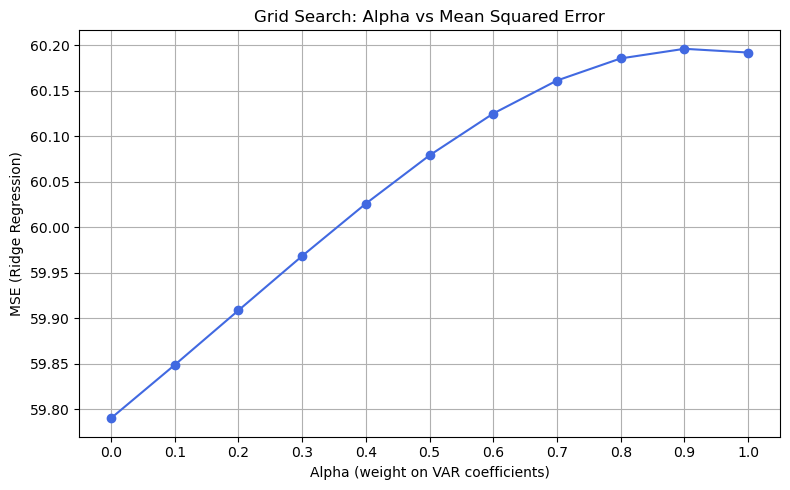

In [86]:
# ----------------------
# STEP 5: Plot Results
# ----------------------
plt.figure(figsize=(8, 5))
plt.plot(list(results.keys()), list(results.values()), marker='o', linestyle='-', color='royalblue')
plt.title("Grid Search: Alpha vs Mean Squared Error")
plt.xlabel("Alpha (weight on VAR coefficients)")
plt.ylabel("MSE (Ridge Regression)")
plt.grid(True)
plt.xticks(alphas)
plt.tight_layout()
plt.show()

In [87]:
# Inside your loop over states
coef_vec = result.coefs.flatten()
ir_8 = irf.orth_irfs[8].flatten()
feature_vec = np.concatenate([coef_vec, ir_8])

X_all = regression_df.drop(columns=["State", "STLFSI4", "VIX", "VVIX", "EPU"])
split_idx = 4  # because now you have 4 VAR + 4 IRF(8)

X_coef = X_all.iloc[:, :split_idx].copy()
X_irf = X_all.iloc[:, split_idx:].copy()

# Standardize
X_coef_scaled = StandardScaler().fit_transform(X_coef)
X_irf_scaled = StandardScaler().fit_transform(X_irf)

# Alpha blending loop
alphas = np.round(np.arange(0.0, 1.1, 0.1), 2)
results = {}

for alpha in alphas:
    X_combined = np.concatenate([
        alpha * X_coef_scaled,
        (1 - alpha) * X_irf_scaled
    ], axis=1)

    model = RidgeCV(alphas=np.logspace(-3, 3, 20), cv=10).fit(X_combined, y)
    preds = model.predict(X_combined)
    mse = mean_squared_error(y, preds)
    results[alpha] = mse

optimal_alpha = min(results, key=results.get)
print(f"✅ Optimal alpha (IRF-8 only): {optimal_alpha}")



✅ Optimal alpha (IRF-8 only): 0.0


## Aplha Grid Setup

In [88]:
# Define candidate alphas
alphas = np.round(np.arange(0.0, 1.1, 0.1), 2)

# Store alpha to MSE map
alpha_mse_scores = {}


### Dynamic Feature Blending

In [89]:
def blend_features(alpha, X_coef_scaled, X_irf_scaled):
    # Weighted stacking of coefficient + IRF features
    X_blended = np.concatenate([
        alpha * X_coef_scaled,
        (1 - alpha) * X_irf_scaled
    ], axis=1)
    return X_blended


### KNN

In [90]:
from sklearn.neighbors import NearestNeighbors

def get_knn_matches(X, state_names, treated_states, k=5):
    matches = {}
    knn = NearestNeighbors(n_neighbors=k+1, metric='euclidean')
    knn.fit(X)

    for state in treated_states:
        idx = np.where(state_names == state)[0][0]
        dists, indices = knn.kneighbors([X[idx]])
        neighbors = [state_names[i] for i in indices[0] if state_names[i] != state]
        matches[state] = neighbors[:k]
    
    return matches


## G- Selection

### 1. Create Baseline df

In [96]:

# Load the yearly bank data; assumes columns include "Year", "State", "PTXNOINC", "ASSET", "ELNATR", "LNLSGR"
bank_df = pd.read_csv("bank-data.csv")

# Compute bank health ratios:
# Profitability Ratio = PTXNOINC / ASSET
# Asset Quality Ratio = ELNATR / LNLSGR
bank_df["profitability"] = bank_df["PTXNOINC"] / bank_df["ASSET"]
bank_df["asset_quality"] = bank_df["ELNATR"] / bank_df["LNLSGR"]

# The bank data is yearly; we need to 'upsample' it to quarterly.
# Define the four quarters as strings.
quarters = [" Q1", " Q2", " Q3", " Q4"]

# Create a list to store the quarterly data
bank_quarterly_list = []

# For each quarter, replicate the yearly data and assign a YearQuarter value.
for q in quarters:
    temp = bank_df.copy()
    # Create a new column "YearQuarter" that combines the Year and the quarter string.
    temp["YearQuarter"] = temp["YEAR"].astype(str) + q
    bank_quarterly_list.append(temp)

# Concatenate all the quarterly blocks into one DataFrame.
bank_df_quarterly = pd.concat(bank_quarterly_list, ignore_index=True)

# Optional: drop the original "Year" column if no longer needed
bank_df_quarterly = bank_df_quarterly.drop(columns=["YEAR"])

# Optionally, sort by State and YearQuarter for convenience
bank_df_quarterly.sort_values(["STNAME", "YearQuarter"], inplace=True)
bank_df_quarterly.reset_index(drop=True, inplace=True)

# Display the first few rows to verify the transformation
print(bank_df_quarterly.head(10))


     ASSET  ELNATR          ID   LNLSGR  PTXNOINC   STNAME  profitability  \
0  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
1  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
2  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
3  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
4  7640462       0  SI_1985_AL  5161650      4970  Alabama       0.000650   
5  7640462       0  SI_1985_AL  5161650      4970  Alabama       0.000650   
6  7640462       0  SI_1985_AL  5161650      4970  Alabama       0.000650   
7  7640462       0  SI_1985_AL  5161650      4970  Alabama       0.000650   
8  8494179       0  SI_1986_AL  5383460      8331  Alabama       0.000981   
9  8494179       0  SI_1986_AL  5383460      8331  Alabama       0.000981   

   asset_quality YearQuarter  
0            0.0     1984 Q1  
1            0.0     1984 Q2  
2            0.0     1984 Q3  
3            0.0     1984 Q4

In [92]:
debt_df= pd.read_csv("household-debt-by-state.csv")

In [95]:
bank_df_quarterly["YearQuarter"].dtype

dtype('O')

In [98]:
# 1) Remove the space so "1999 Q1" → "1999Q1"
bank_df_quarterly["YearQuarter"] = bank_df_quarterly["YearQuarter"].str.replace(" Q", "Q", regex=False)

# 2) Convert to a PeriodIndex with quarterly frequency
bank_df_quarterly["YearQuarter"] = pd.PeriodIndex(bank_df_quarterly["YearQuarter"], freq="Q")

# Optional: verify the result
print(bank_df_quarterly["YearQuarter"].dtype)
print(bank_df_quarterly.head(5))


period[Q-DEC]
     ASSET  ELNATR          ID   LNLSGR  PTXNOINC   STNAME  profitability  \
0  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
1  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
2  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
3  6606706       0  SI_1984_AL  4603515     -4788  Alabama      -0.000725   
4  7640462       0  SI_1985_AL  5161650      4970  Alabama       0.000650   

   asset_quality YearQuarter  
0            0.0      1984Q1  
1            0.0      1984Q2  
2            0.0      1984Q3  
3            0.0      1984Q4  
4            0.0      1985Q1  


In [99]:
common_start = pd.Period("1999Q1", freq="Q")
common_end   = pd.Period("2008Q2", freq="Q")

bank_df_quarterly_filtered = bank_df_quarterly[
    (bank_df_quarterly["YearQuarter"] >= common_start) &
    (bank_df_quarterly["YearQuarter"] <= common_end)
].copy()

# -------------------------------
# Step 2: Process State Names in Bank Data
# -------------------------------
bank_df_quarterly_filtered["STNAME"] = bank_df_quarterly_filtered["STNAME"].str.lower().str.strip()
bank_df_quarterly_filtered.rename(columns={"STNAME": "State"}, inplace=True)

bank_df_quarterly_filtered

,ASSET,ELNATR,ID,LNLSGR,PTXNOINC,State,profitability,asset_quality,YearQuarter
60,2031254,4638,SI_1999_AL,1451958,3882,alabama,0.001911,0.003194,1999Q1
61,2031254,4638,SI_1999_AL,1451958,3882,alabama,0.001911,0.003194,1999Q2
62,2031254,4638,SI_1999_AL,1451958,3882,alabama,0.001911,0.003194,1999Q3
63,2031254,4638,SI_1999_AL,1451958,3882,alabama,0.001911,0.003194,1999Q4
64,2216655,5866,SI_2000_AL,1613031,13159,alabama,0.005936,0.003637,2000Q1
...,...,...,...,...,...,...,...,...,...
8621,466290,249,SI_2007_WY,260781,3846,wyoming,0.008248,0.000955,2007Q2
8622,466290,249,SI_2007_WY,260781,3846,wyoming,0.008248,0.000955,2007Q3
8623,466290,249,SI_2007_WY,260781,3846,wyoming,0.008248,0.000955,2007Q4
8624,516285,1102,SI_2008_WY,304668,3234,wyoming,0.006264,0.003617,2008Q1


In [102]:
# Load household debt data; assumes a column "state_fips" exists.
debt_df = pd.read_csv("household-debt-by-state.csv")

# Map FIPS codes to state names.
fips_map = {
    "01": "alabama", "02": "alaska", "04": "arizona", "05": "arkansas", "06": "california",
    "08": "colorado", "09": "connecticut", "10": "delaware", "11": "district of columbia",
    "12": "florida", "13": "georgia", "15": "hawaii", "16": "idaho", "17": "illinois",
    "18": "indiana", "19": "iowa", "20": "kansas", "21": "kentucky", "22": "louisiana",
    "23": "maine", "24": "maryland", "25": "massachusetts", "26": "michigan", "27": "minnesota",
    "28": "mississippi", "29": "missouri", "30": "montana", "31": "nebraska", "32": "nevada",
    "33": "new hampshire", "34": "new jersey", "35": "new mexico", "36": "new york",
    "37": "north carolina", "38": "north dakota", "39": "ohio", "40": "oklahoma", "41": "oregon",
    "42": "pennsylvania", "44": "rhode island", "45": "south carolina", "46": "south dakota",
    "47": "tennessee", "48": "texas", "49": "utah", "50": "vermont", "51": "virginia",
    "53": "washington", "54": "west virginia", "55": "wisconsin", "56": "wyoming"
}

# Ensure the FIPS code has two digits.
debt_df["FIPS"] = debt_df["state_fips"].astype(str).str.zfill(2)
# Create a new column "State" using the mapping.
debt_df["State"] = debt_df["FIPS"].map(fips_map)


In [103]:
debt_df

,year,qtr,state_fips,low,high,FIPS,State
0,1999,1,1,0.40,1.11,01,alabama
1,1999,1,2,1.24,1.32,02,alaska
2,1999,1,4,1.32,1.40,04,arizona
3,1999,1,5,0.40,1.11,05,arkansas
4,1999,1,6,1.60,1.72,06,california
...,...,...,...,...,...,...,...
5247,2024,3,51,1.50,1.60,51,virginia
5248,2024,3,53,1.50,1.60,53,washington
5249,2024,3,54,1.11,1.24,54,west virginia
5250,2024,3,55,1.11,1.24,55,wisconsin


In [104]:
# 1) Create the 'YearQuarter' string column from 'year' and 'qtr'
debt_df["YearQuarter"] = debt_df["year"].astype(str) + "Q" + debt_df["qtr"].astype(str)

# 2) Convert that string to a PeriodIndex with quarterly frequency
debt_df["YearQuarter"] = pd.PeriodIndex(debt_df["YearQuarter"], freq="Q")

# 3) (Optional) Sort by State and YearQuarter, then reset index
debt_df.sort_values(["State", "YearQuarter"], inplace=True)
debt_df.reset_index(drop=True, inplace=True)

print(debt_df.head(10))


   year  qtr  state_fips   low  high FIPS    State YearQuarter
0  1999    1           1  0.40  1.11   01  alabama      1999Q1
1  1999    2           1  1.11  1.24   01  alabama      1999Q2
2  1999    3           1  0.40  1.11   01  alabama      1999Q3
3  1999    4           1  0.40  1.11   01  alabama      1999Q4
4  2000    1           1  1.11  1.24   01  alabama      2000Q1
5  2000    2           1  1.11  1.24   01  alabama      2000Q2
6  2000    3           1  1.11  1.24   01  alabama      2000Q3
7  2000    4           1  1.11  1.24   01  alabama      2000Q4
8  2001    1           1  1.24  1.32   01  alabama      2001Q1
9  2001    2           1  1.11  1.24   01  alabama      2001Q2


In [105]:
# -------------------------------
# Step 3: Aggregate Bank Data by State AND YearQuarter
# -------------------------------
# We group by ["State", "YearQuarter"] so each row in the result is for a specific quarter of a specific state.
baseline_bank = (
    bank_df_quarterly_filtered
    .groupby(["State", "YearQuarter"])[["profitability", "asset_quality"]]
    .mean()
    .reset_index()
)

print("Aggregated Bank Data (baseline_bank) per State–Quarter:")
print(baseline_bank.head())

# -------------------------------
# Step 4: Household Debt Data Already Loaded
# (With columns [State, low, high, YearQuarter])
# -------------------------------
# For clarity, let's display the top rows of debt_df again
print("\nHousehold Debt Data (debt_df) with YearQuarter:")
print(debt_df.head())

# -------------------------------
# Step 5: Merge the Two Datasets by [State, YearQuarter]
# -------------------------------
# This ensures each row of baseline_df corresponds to one state in one quarter.
baseline_df = pd.merge(
    debt_df, 
    baseline_bank, 
    on=["State", "YearQuarter"], 
    how="inner"
)

print("\nMerged Baseline Candidate Data (baseline_df) per State–Quarter:")
print(baseline_df.head(10))


Aggregated Bank Data (baseline_bank) per State–Quarter:
     State YearQuarter  profitability  asset_quality
0  alabama      1999Q1       0.001911       0.003194
1  alabama      1999Q2       0.001911       0.003194
2  alabama      1999Q3       0.001911       0.003194
3  alabama      1999Q4       0.001911       0.003194
4  alabama      2000Q1       0.005936       0.003637

Household Debt Data (debt_df) with YearQuarter:
   year  qtr  state_fips   low  high FIPS    State YearQuarter
0  1999    1           1  0.40  1.11   01  alabama      1999Q1
1  1999    2           1  1.11  1.24   01  alabama      1999Q2
2  1999    3           1  0.40  1.11   01  alabama      1999Q3
3  1999    4           1  0.40  1.11   01  alabama      1999Q4
4  2000    1           1  1.11  1.24   01  alabama      2000Q1

Merged Baseline Candidate Data (baseline_df) per State–Quarter:
   year  qtr  state_fips   low  high FIPS    State YearQuarter  profitability  \
0  1999    1           1  0.40  1.11   01  alabama   

In [106]:
baseline_df

,year,qtr,state_fips,low,high,FIPS,State,YearQuarter,profitability,asset_quality
0,1999,1,1,0.40,1.11,01,alabama,1999Q1,0.001911,0.003194
1,1999,2,1,1.11,1.24,01,alabama,1999Q2,0.001911,0.003194
2,1999,3,1,0.40,1.11,01,alabama,1999Q3,0.001911,0.003194
3,1999,4,1,0.40,1.11,01,alabama,1999Q4,0.001911,0.003194
4,2000,1,1,1.11,1.24,01,alabama,2000Q1,0.005936,0.003637
...,...,...,...,...,...,...,...,...,...,...
1895,2007,2,56,1.32,1.40,56,wyoming,2007Q2,0.008248,0.000955
1896,2007,3,56,1.32,1.40,56,wyoming,2007Q3,0.008248,0.000955
1897,2007,4,56,1.32,1.40,56,wyoming,2007Q4,0.008248,0.000955
1898,2008,1,56,1.32,1.40,56,wyoming,2008Q1,0.006264,0.003617


In [ ]:
#baseline_df.to_csv("baseline_data.csv", index=False)

In [108]:
from arch.unitroot import PhillipsPerron

In [109]:
# Ensure baseline_df is sorted by State and YearQuarter
baseline_df = baseline_df.sort_values(["State", "YearQuarter"])

# Define a helper function that runs the PP test on a series and returns a Series of results.
def run_pp(series):
    s = series.dropna()
    if len(s) < 5:
        return pd.Series({"pvalue": None, "stat": None, "result": "Insufficient"})
    else:
        pp_test = PhillipsPerron(s, trend="c")
        return pd.Series({
            "pvalue": pp_test.pvalue,
            "stat": pp_test.stat,
            "result": "Pass" if pp_test.pvalue < 0.05 else "Fail"
        })

# -----------------
# For 'high'
# -----------------
high_results = baseline_df.groupby("State")["high"].apply(run_pp)
# Convert the series of dictionaries into a DataFrame by expanding the dictionary into separate columns
high_results_df = high_results.apply(pd.Series).reset_index()
# Rename columns appropriately
high_results_df.rename(
    columns={
        "pvalue": "pvalue_high",
        "stat": "stat_high",
        "result": "result_high"
    },
    inplace=True
)
print("PP Test Results for 'high':")
print(high_results_df.head(10))

PP Test Results for 'high':
      State level_1         0
0   alabama  pvalue  0.670167
1   alabama    stat -1.207949
2   alabama  result      Fail
3    alaska  pvalue  0.899494
4    alaska    stat -0.460515
5    alaska  result      Fail
6   arizona  pvalue  0.879342
7   arizona    stat -0.561988
8   arizona  result      Fail
9  arkansas  pvalue  0.919474


In [110]:
# 1) Rename column 0 → 'val'
df_renamed = high_results_df.rename(columns={0: "val"})

# 2) Pivot the table:
#    index='State'        means each unique State becomes its own row
#    columns='level_1'    means pvalue / stat / result become columns
#    values='val'         means we populate those columns with the 'val' data
df_wide = df_renamed.pivot(index="State", columns="level_1", values="val").reset_index()

# 3) The pivot leaves a column index name; remove it if present
df_wide.columns.name = None

# 4) Rename pivoted columns to your desired final names
df_wide.rename(
    columns={
        "pvalue": "pvalue_high",
        "stat":   "stat_high",
        "result": "result_high"
    },
    inplace=True
)

# Now df_wide has columns: ['State', 'pvalue_high', 'stat_high', 'result_high']
print(df_wide)

             State pvalue_high result_high stat_high
0          alabama    0.670167        Fail -1.207949
1           alaska    0.899494        Fail -0.460515
2          arizona    0.879342        Fail -0.561988
3         arkansas    0.919474        Fail -0.341128
4       california     0.78661        Fail -0.904129
5         colorado    0.988521        Fail  0.638227
6      connecticut    0.936651        Fail -0.215478
7         delaware    0.975177        Fail  0.254888
8          florida    0.934528        Fail -0.232557
9          georgia     0.75639        Fail -0.991394
10          hawaii    0.000008        Pass -5.226336
11           idaho    0.833421        Fail -0.749815
12        illinois    0.931218        Fail -0.258208
13         indiana    0.741198        Fail -1.032576
14            iowa    0.894257        Fail -0.488417
15          kansas    0.676732        Fail  -1.19269
16        kentucky    0.720054        Fail -1.087441
17       louisiana    0.383505        Fail -1.

In [111]:
# -----------------
# For 'profitability'
# -----------------
profit_results = baseline_df.groupby("State")["profitability"].apply(run_pp)
profit_results_df = profit_results.apply(pd.Series).reset_index()
profit_results_df.rename(
    columns={
        "pvalue": "pvalue_profit",
        "stat": "stat_profit",
        "result": "result_profit"
    },
    inplace=True
)
print("\nPP Test Results for 'profitability':")
print(profit_results_df.head(10))

# -----------------
# For 'asset_quality'
# -----------------
asset_results = baseline_df.groupby("State")["asset_quality"].apply(run_pp)
asset_results_df = asset_results.apply(pd.Series).reset_index()
asset_results_df.rename(
    columns={
        "pvalue": "pvalue_asset",
        "stat": "stat_asset",
        "result": "result_asset"
    },
    inplace=True
)
print("\nPP Test Results for 'asset_quality':")
print(asset_results_df.head(10))



PP Test Results for 'profitability':
      State level_1         0
0   alabama  pvalue  0.899884
1   alabama    stat -0.458388
2   alabama  result      Fail
3    alaska  pvalue  0.691826
4    alaska    stat -1.156972
5    alaska  result      Fail
6   arizona  pvalue  0.922386
7   arizona    stat -0.321623
8   arizona  result      Fail
9  arkansas  pvalue       1.0

PP Test Results for 'asset_quality':
      State level_1         0
0   alabama  pvalue  0.935742
1   alabama    stat -0.222853
2   alabama  result      Fail
3    alaska  pvalue  0.927102
4    alaska    stat -0.288611
5    alaska  result      Fail
6   arizona  pvalue  0.998513
7   arizona    stat   1.89063
8   arizona  result      Fail
9  arkansas  pvalue   0.82403


In [112]:
# 1) Rename column 0 → 'val'
df_renamed = profit_results_df.rename(columns={0: "val"})

# 2) Pivot the table:
#    index='State'        means each unique State becomes its own row
#    columns='level_1'    means pvalue / stat / result become columns
#    values='val'         means we populate those columns with the 'val' data
df_wide = df_renamed.pivot(index="State", columns="level_1", values="val").reset_index()

# 3) The pivot leaves a column index name; remove it if present
df_wide.columns.name = None

# 4) Rename pivoted columns to your desired final names
df_wide.rename(
    columns={
        "pvalue": "pvalue_profit",
        "stat":   "stat_profit",
        "result": "result_profit"
    },
    inplace=True
)

# Now df_wide has columns: ['State', 'pvalue_high', 'stat_high', 'result_profit']
print(df_wide)

             State pvalue_profit result_profit stat_profit
0          alabama      0.899884          Fail   -0.458388
1           alaska      0.691826          Fail   -1.156972
2          arizona      0.922386          Fail   -0.321623
3         arkansas           1.0          Fail    3.217604
4       california       0.98645          Fail    0.554915
5         colorado       0.25306          Fail   -2.078957
6      connecticut      0.463955          Fail   -1.636759
7         delaware      0.993523          Fail    0.934341
8          florida      0.997353          Fail    1.455706
9          georgia      0.523381          Fail   -1.520432
10          hawaii      0.471813          Fail   -1.621747
11           idaho      0.654044          Fail   -1.244776
12        illinois      0.794522          Fail   -0.879892
13         indiana      0.768689          Fail   -0.956811
14            iowa      0.974082          Fail    0.233562
15          kansas      0.340059          Fail   -1.8830

In [113]:
failed_states = df_wide[df_wide["result_profit"] == "Fail"]["State"].tolist()
print(failed_states)

['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming']


In [114]:
# 1) Rename column 0 → 'val'
df_renamed = asset_results_df.rename(columns={0: "val"})

# 2) Pivot the table:
#    index='State'        means each unique State becomes its own row
#    columns='level_1'    means pvalue / stat / result become columns
#    values='val'         means we populate those columns with the 'val' data
df_wide = df_renamed.pivot(index="State", columns="level_1", values="val").reset_index()

# 3) The pivot leaves a column index name; remove it if present
df_wide.columns.name = None

# 4) Rename pivoted columns to your desired final names
df_wide.rename(
    columns={
        "pvalue": "pvalue_asset",
        "stat":   "stat_asset",
        "result": "result_asset"
    },
    inplace=True
)

# Now df_wide has columns: ['State', 'pvalue_high', 'stat_high', 'result_profit']
print(df_wide)

             State pvalue_asset result_asset stat_asset
0          alabama     0.935742         Fail  -0.222853
1           alaska     0.927102         Fail  -0.288611
2          arizona     0.998513         Fail    1.89063
3         arkansas      0.82403         Fail  -0.783122
4       california       0.9982         Fail   1.730354
5         colorado     0.944794         Fail  -0.144755
6      connecticut     0.547413         Fail  -1.471798
7         delaware     0.963502         Fail    0.06381
8          florida     0.983948         Fail   0.470485
9          georgia     0.810359         Fail  -0.829317
10          hawaii     0.519411         Fail  -1.528415
11           idaho     0.897829         Fail  -0.469519
12        illinois     0.593581         Fail  -1.376307
13         indiana     0.747036         Fail  -1.016941
14            iowa     0.911225         Fail  -0.393219
15          kansas     0.966719         Fail   0.109724
16        kentucky     0.375791         Fail  -1

In [115]:
failed_states = df_wide[df_wide["result_asset"] == "Fail"]["State"].tolist()
print(failed_states)

['alabama', 'alaska', 'arizona', 'arkansas', 'california', 'colorado', 'connecticut', 'delaware', 'florida', 'georgia', 'hawaii', 'idaho', 'illinois', 'indiana', 'iowa', 'kansas', 'kentucky', 'louisiana', 'maine', 'maryland', 'massachusetts', 'michigan', 'minnesota', 'mississippi', 'missouri', 'montana', 'nebraska', 'nevada', 'new hampshire', 'new jersey', 'new mexico', 'new york', 'north carolina', 'north dakota', 'ohio', 'oklahoma', 'oregon', 'pennsylvania', 'rhode island', 'south carolina', 'south dakota', 'tennessee', 'texas', 'utah', 'vermont', 'virginia', 'washington', 'west virginia', 'wisconsin', 'wyoming']
